# GLM group maps and tables

In [1]:
# Imports
import os
from nilearn.glm import threshold_stats_img
from nilearn import plotting
import matplotlib.pyplot as plt

# import numpy as np
import pandas as pd
from nilearn.reporting import get_clusters_table
from nilearn.image import math_img
from mni_to_atlas import AtlasBrowser

atlas = AtlasBrowser("AAL3")

# set pandas to display 100 rows
pd.set_option("display.max_rows", 100)

In [2]:
# Settings
# data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = "/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/"
# data_dir = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2"  # sim01 dir
out_dir = os.path.join(data_dir, "derivatives", "nilearn_glm")
out_dir_group = os.path.join(data_dir, "derivatives", "nilearn_glm", "group")
group_fig_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_figures")
group_tab_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_tables")
group_clust_dir = os.path.join(data_dir, "derivatives", "nilearn_glm", "group_clusters")

In [3]:
from templateflow import api as tflow

t1w_img = tflow.get("MNI152NLin2009cAsym", desc="brain", resolution=1, suffix="T1w", extension="nii.gz")
t1w_img

100%|██████████| 3.47M/3.47M [00:00<00:00, 3.54MB/s]


PosixPath('/Users/alexandresayal/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_desc-brain_T1w.nii.gz')

In [ ]:
# TODO gray matter mask ?

In [17]:
contrasts_renamed = [
    "All",
    "JoyfulActivation",
    "Nostalgia",
    "Peacefulness",
    "Power",
    "Sadness",
    "Tenderness",
    "Tension",
    "Transcendence",
    "Wonder",
    "Sublimity",
    "Vitality",
    "Unease",
    "SublimityMinusVitality",
    "VitalityMinusUnease",
    "UneaseMinusSublimity",
]

In [18]:
# Threshold values
hc = "fdr"  # None, 'bonferroni', 'fdr'
ct = 20  # cluster threshold
alpha = 0.01  # p-value threshold

In [19]:
c_idx = 0
print(contrasts_renamed[c_idx])

All


Threshold: 3.418236138364793


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



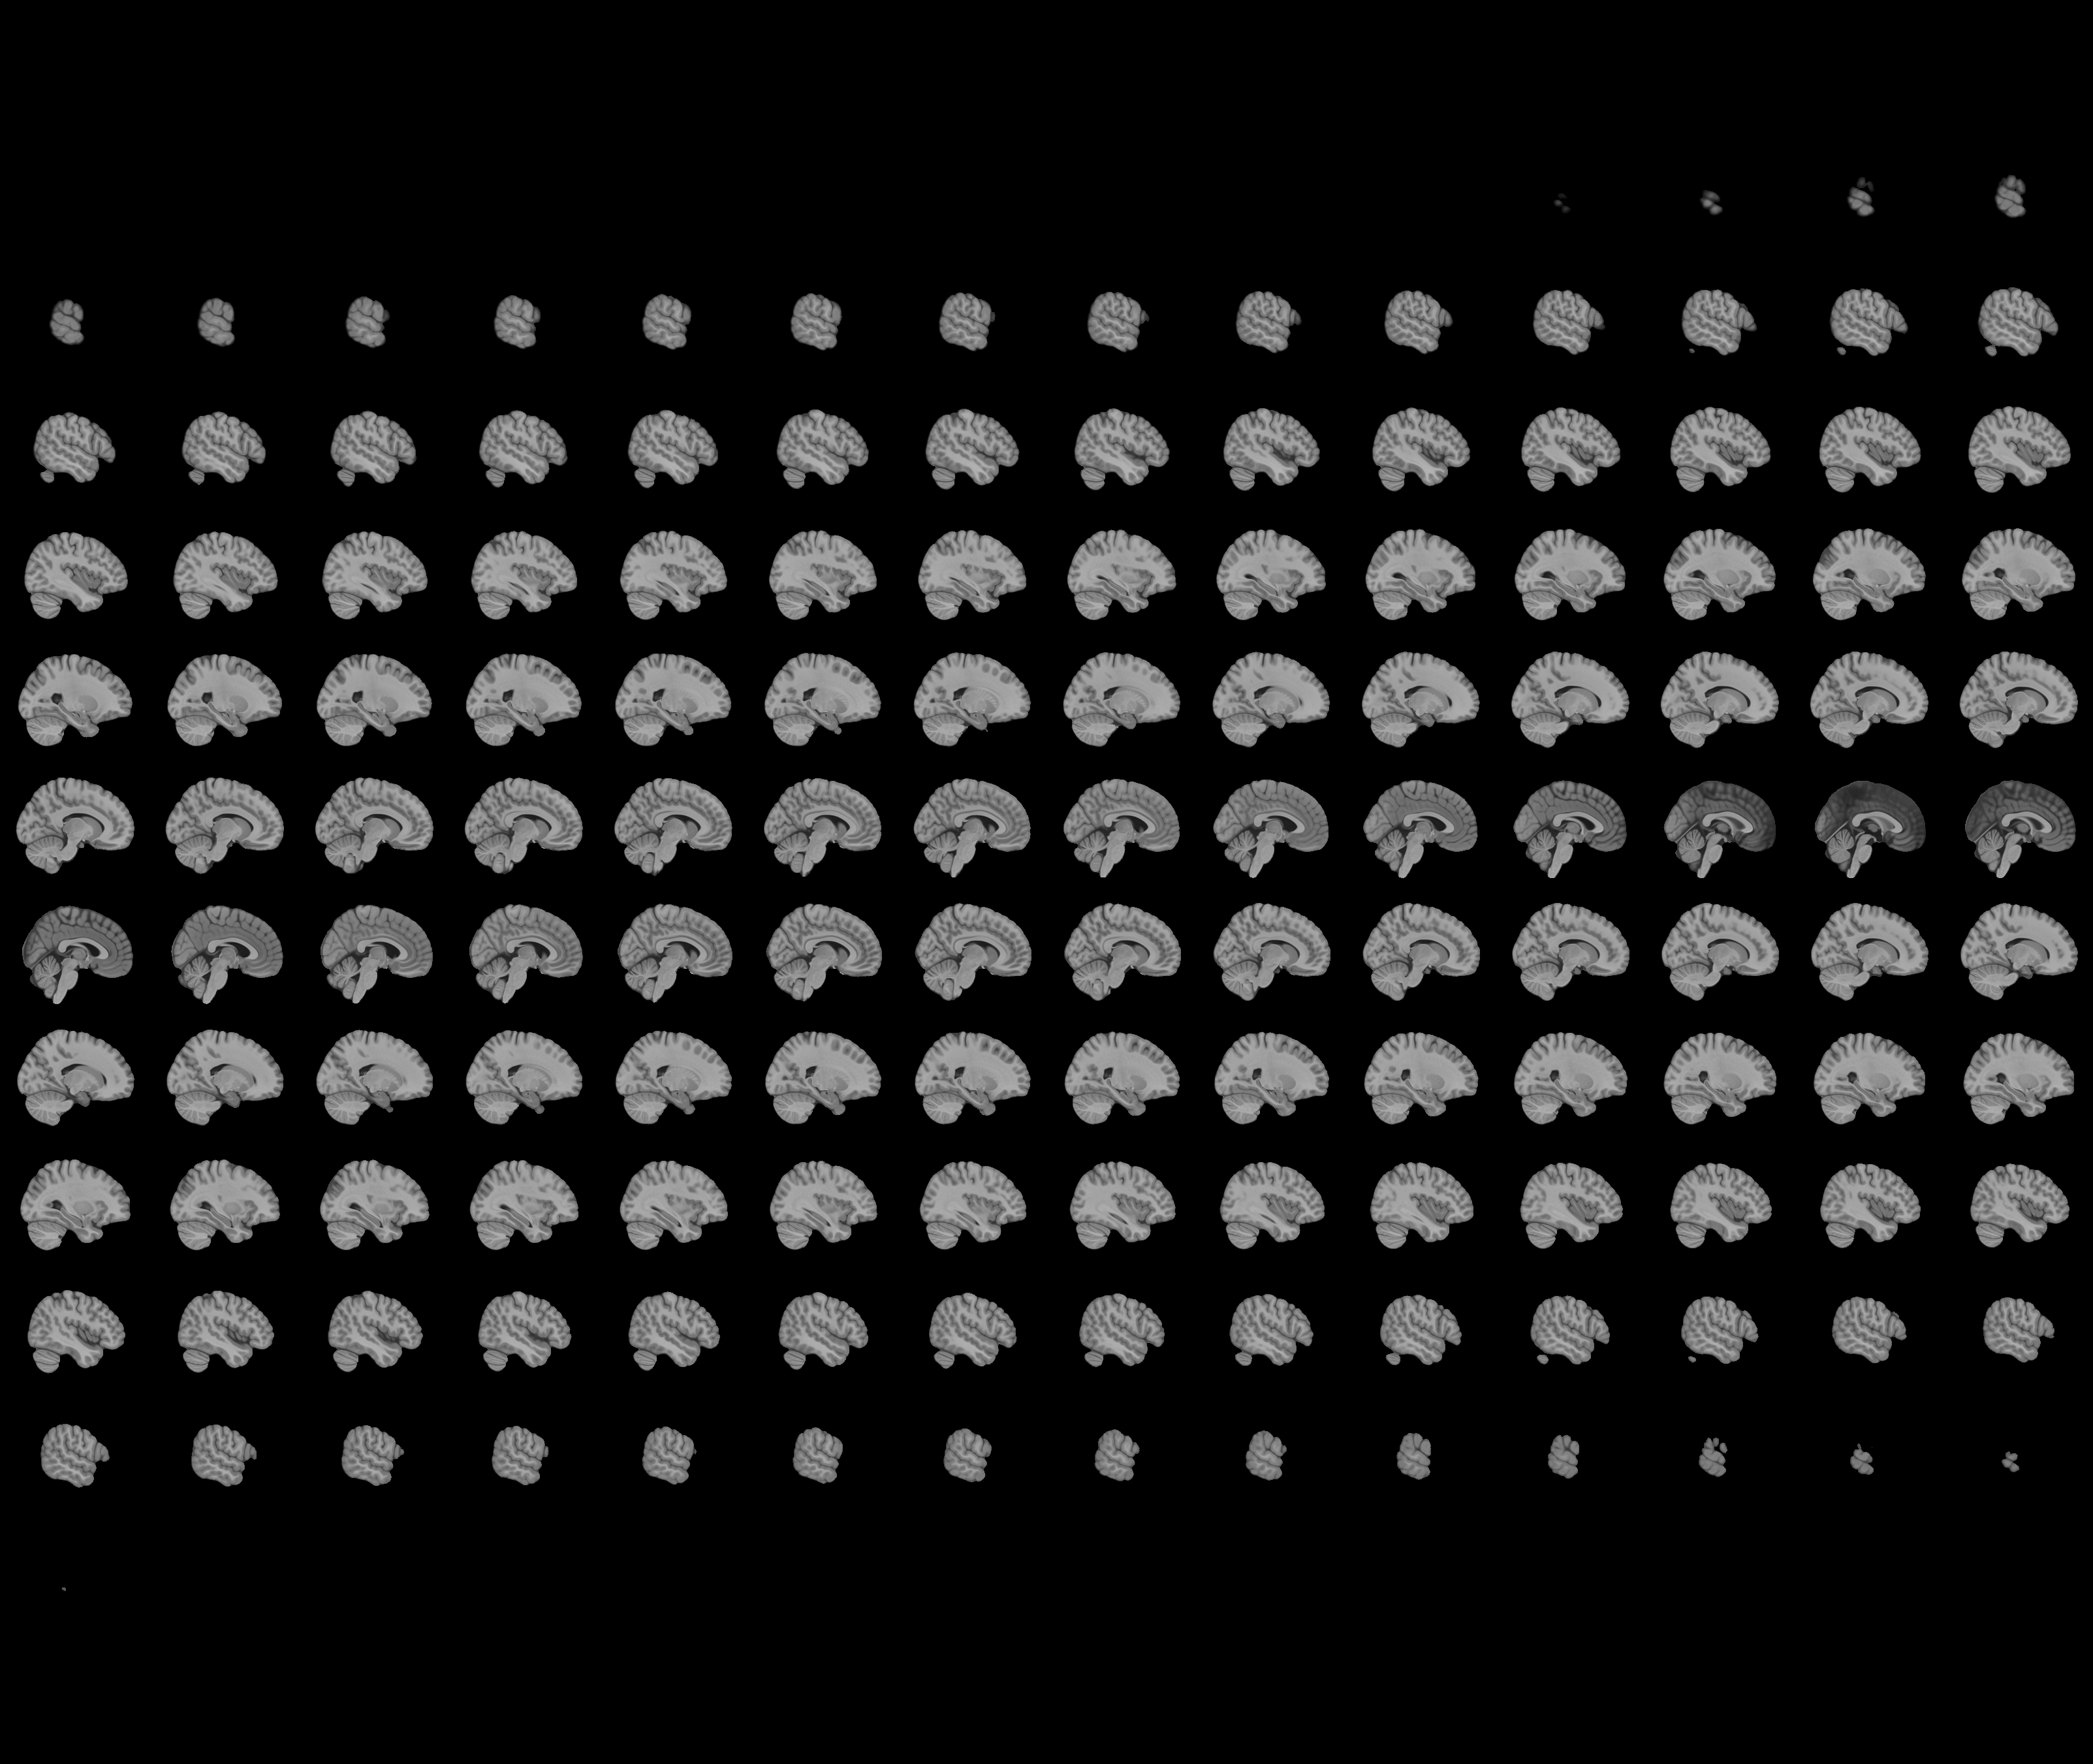
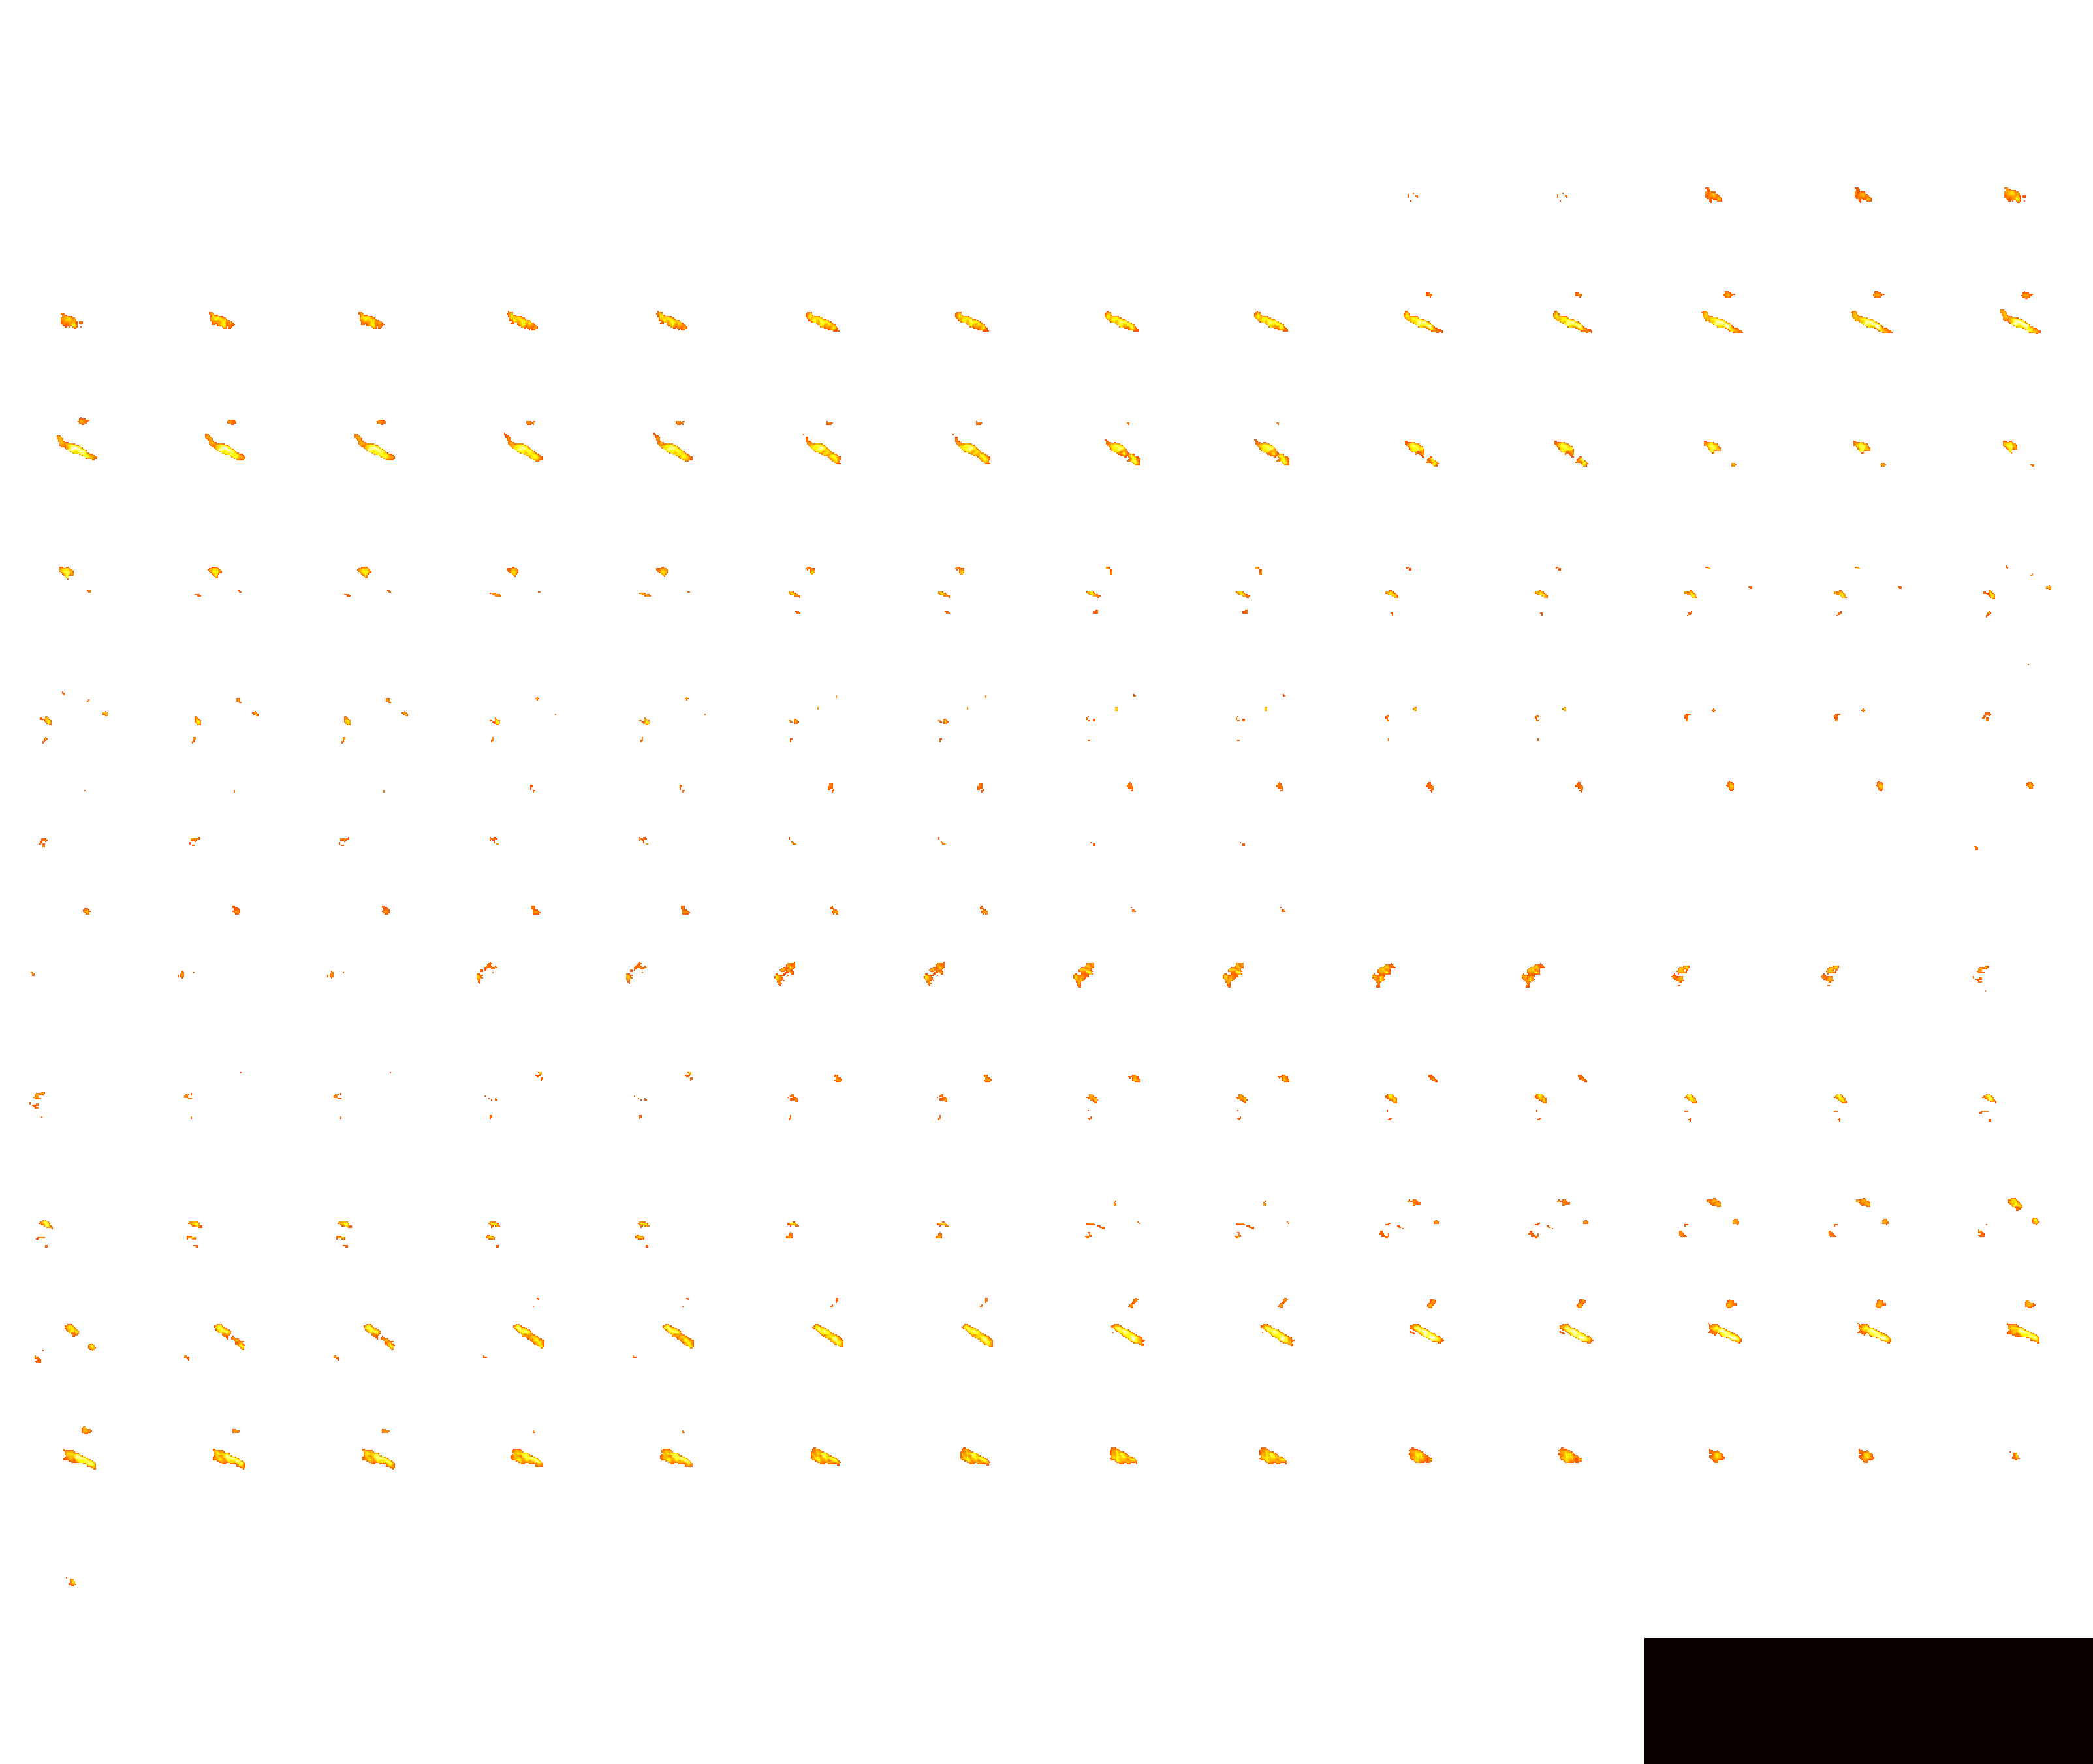

In [20]:
z_map_g = os.path.join(out_dir_group, f"group_task-02a_stat-z_con-{contrasts_renamed[c_idx]}.nii.gz")

clean_map_g, threshold_g = threshold_stats_img(z_map_g, alpha=alpha, height_control=hc, cluster_threshold=ct)

print(f"Threshold: {threshold_g}")

# threshold clean_map_g to only show positive values
clean_map_g = math_img("np.maximum(img, 0)", img=clean_map_g)

# View map interactively
plotting.view_img(
    clean_map_g,
    threshold=threshold_g,
    symmetric_cmap=False,
    colorbar=True,
    cmap="hot",
    cut_coords=(21, -2, -16),
    width_view=800,
    bg_img=t1w_img,
    resampling_interpolation="nearest",
)

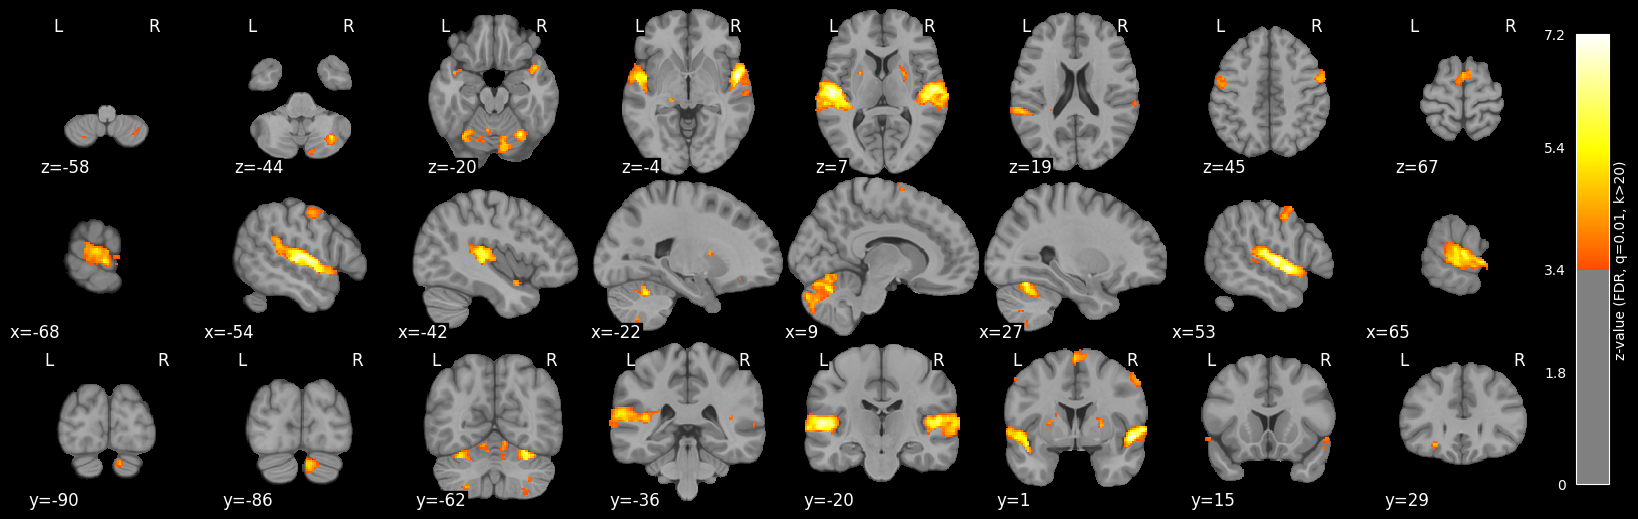

In [21]:
# beautiful mosaic figure

# Create a new figure and axis with black background
fig = plt.figure(figsize=(16, 5), facecolor="black")

display = plotting.plot_stat_map(
    clean_map_g,
    threshold=threshold_g,
    display_mode="mosaic",
    cut_coords=8,
    colorbar=True,
    symmetric_cbar=False,
    cmap="hot",
    figure=fig,
    bg_img=t1w_img,
    resampling_interpolation="nearest",
)

# Customize the colorbar
cbar = display._cbar
cbar.set_label(f"z-value (FDR, q={alpha}, k>{ct})")
# change colorbar label color to white
cbar.ax.yaxis.label.set_color("white")

# Show the plot
plt.show()

In [22]:
# Save the thresholded map figure
fig_file = os.path.join(
    group_fig_dir,
    f"mosaic_stat-z_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.png",
)
plt.savefig(fig_file, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [23]:
# Cluster table
table_g, cluster_map_g = get_clusters_table(z_map_g, threshold_g, ct, return_label_maps=True)

# AAL3 labelling
coordinates = table_g[["X", "Y", "Z"]].to_numpy()
aal_labels = atlas.find_regions(coordinates, plot=False)

# Add the labels to the table
table_g["AAL3"] = aal_labels

# print(table_g)
# print(table.to_latex())
table_g

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),AAL3
0,1,-56.5,-4.5,-0.5,7.152008,20192,Temporal_Sup_L
1,1a,-52.5,-16.5,7.5,6.989843,,Heschl_L
2,1b,-42.5,-28.5,3.5,6.292679,,Temporal_Sup_L
3,1c,-46.5,-26.5,11.5,6.043242,,Temporal_Sup_L
4,2,53.5,1.5,-4.5,7.105111,18176,Temporal_Sup_R
5,2a,53.5,-10.5,3.5,7.055810,,Heschl_R
6,2b,55.5,5.5,-4.5,6.838463,,Temporal_Pole_Sup_R
7,2c,61.5,-4.5,3.5,6.689838,,Temporal_Sup_R
8,3,27.5,-62.5,-20.5,6.238260,2384,Cerebellum_6_R
9,3a,39.5,-50.5,-28.5,4.162673,,Cerebellum_6_R


In [24]:
# Export cluster table
table_g.to_csv(
    os.path.join(
        group_tab_dir,
        f"clusters_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.tsv",
    ),
    sep="\t",
)

In [25]:
# save cluster_map_g
cluster_map_g[0].to_filename(
    os.path.join(
        group_clust_dir,
        f"clustersmap_con-{contrasts_renamed[c_idx]}_{hc}-{alpha}_k-{ct}.nii.gz",
    ),
)

In [26]:
# split map into separate files
import nibabel as nib

# Load the cluster map
cluster_data = cluster_map_g[0].get_fdata()

# Filter table_g to include only integer Cluster IDs
integer_cluster_ids = [cluster_id for cluster_id in table_g["Cluster ID"] if isinstance(cluster_id, int)]

# Iterate through each cluster in the table and create masks
for cluster_id in integer_cluster_ids:
    # Create a binary mask for the current cluster
    cluster_mask_data = (cluster_data == cluster_id).astype(int)

    # Create a new Nifti image for the mask
    cluster_mask_img = nib.Nifti1Image(cluster_mask_data, cluster_map_g[0].affine, cluster_map_g[0].header)

    # Define the output file path
    output_file = os.path.join(group_clust_dir, f"mask_clusterid-{cluster_id:02d}.nii.gz")

    # Save the mask image
    nib.save(cluster_mask_img, output_file)

    print(f"Saved mask for cluster {cluster_id} as {output_file}")

Saved mask for cluster 1 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-01.nii.gz
Saved mask for cluster 2 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-02.nii.gz
Saved mask for cluster 3 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-03.nii.gz
Saved mask for cluster 4 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-04.nii.gz
Saved mask for cluster 5 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-05.nii.gz
Saved mask for cluster 6 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-06.nii.gz
Saved mask for cluster 7 as /DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2/derivatives/nilearn_glm/group_clusters/mask_clusterid-07.nii.gz
Saved mask fo